In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
train=pd.read_csv("Training Data Set.csv")

In [47]:
train.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [48]:
train.shape

(53515, 17)

In [49]:
test=pd.read_csv("Test Data Set.csv")

In [50]:
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [51]:
test.shape

(5615, 16)

In [52]:
train["Maker"].value_counts()

skoda       21563
toyota       7840
audi         7326
bmw          7178
nissan       5485
hyundai      2240
fiat         1845
maserati       38
Name: Maker, dtype: int64

In [53]:
train["Owner Type"].value_counts()

First             13406
Third             13395
Second            13365
Fourth & Above    13349
Name: Owner Type, dtype: int64

In [54]:
train["transmission"].value_counts()

man     36734
auto    16781
Name: transmission, dtype: int64

In [55]:
train.drop(["model","Location","door_count","body_type","seat_count"],axis=1,inplace=True)

In [56]:
train.head()

,Id,Maker,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,fuel_type,Price
0,25001,skoda,NaN,Second,1964,55,1964,147.0,8,man,petrol,543764.25
1,25002,fiat,27750.0,Third,2012,7,1242,51.0,6,man,petrol,401819.25
2,25003,bmw,46000.0,Third,2014,5,1995,105.0,7,auto,diesel,2392855.50
3,25004,nissan,43949.0,Third,2011,8,1618,140.0,7,man,petrol,958606.50
4,25005,bmw,59524.0,Fourth & Above,2012,7,2993,180.0,7,auto,diesel,3085561.50


In [57]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
train['Owner Type']= label_encoder.fit_transform(train['Owner Type']) 


In [58]:
train["Owner Type"].value_counts()
# here 0 represents First hand
#3-Third hand
#2-Second hand
#1-Fourth and above

0    13406
3    13395
2    13365
1    13349
Name: Owner Type, dtype: int64

In [59]:
train.isnull().sum()

Id                        0
Maker                     0
Distance               1211
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power           1439
Vroom Audit Rating        0
transmission              0
fuel_type                 0
Price                     0
dtype: int64

In [60]:
test["Owner Type"].value_counts()

First             1491
Third             1413
Fourth & Above    1376
Second            1335
Name: Owner Type, dtype: int64

In [61]:
train["engine_power"].fillna(train["engine_power"].mean(),inplace=True)

In [62]:
train.isnull().sum()

Id                        0
Maker                     0
Distance               1211
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power              0
Vroom Audit Rating        0
transmission              0
fuel_type                 0
Price                     0
dtype: int64

In [63]:
train["Maker"].value_counts()

skoda       21563
toyota       7840
audi         7326
bmw          7178
nissan       5485
hyundai      2240
fiat         1845
maserati       38
Name: Maker, dtype: int64

In [64]:
train['transmission'].value_counts()

man     36734
auto    16781
Name: transmission, dtype: int64

In [65]:
train['fuel_type'].value_counts()

diesel    27559
petrol    25956
Name: fuel_type, dtype: int64

In [66]:
train['Maker']= label_encoder.fit_transform(train['Maker'])
train['transmission']= label_encoder.fit_transform(train['transmission'])
train['fuel_type']= label_encoder.fit_transform(train['fuel_type'])

In [67]:
train.head()

,Id,Maker,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,fuel_type,Price
0,25001,6,NaN,2,1964,55,1964,147.0,8,1,1,543764.25
1,25002,2,27750.0,3,2012,7,1242,51.0,6,1,1,401819.25
2,25003,1,46000.0,3,2014,5,1995,105.0,7,0,0,2392855.50
3,25004,5,43949.0,3,2011,8,1618,140.0,7,1,1,958606.50
4,25005,1,59524.0,1,2012,7,2993,180.0,7,0,0,3085561.50


In [68]:
train.dtypes

Id                       int64
Maker                    int32
Distance               float64
Owner Type               int32
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
transmission             int32
fuel_type                int32
Price                  float64
dtype: object

In [69]:
train.corr()

,Id,Maker,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,fuel_type,Price
Id,1.000000,0.001518,-0.000282,0.003215,0.001935,-0.001935,0.003698,0.002422,0.005602,-0.005550,0.001921,0.003195
Maker,0.001518,1.000000,0.042456,-0.002007,-0.069465,0.069465,-0.195926,-0.579373,-0.004548,0.379159,0.246158,-0.568821
Distance,-0.000282,0.042456,1.000000,-0.004259,-0.229124,0.229124,0.111261,0.010525,-0.006298,0.017511,-0.014131,-0.158515
Owner Type,0.003215,-0.002007,-0.004259,1.000000,-0.004829,0.004829,0.002344,0.003411,0.000595,-0.000978,-0.006580,-0.003125
manufacture_year,0.001935,-0.069465,-0.229124,-0.004829,1.000000,-1.000000,-0.090401,0.050330,0.003985,-0.127930,-0.112386,0.506707
Age of car,-0.001935,0.069465,0.229124,0.004829,-1.000000,1.000000,0.090401,-0.050330,-0.003985,0.127930,0.112386,-0.506707
engine_displacement,0.003698,-0.195926,0.111261,0.002344,-0.090401,0.090401,1.000000,0.317419,-0.005828,-0.207715,-0.125746,0.162072
engine_power,0.002422,-0.579373,0.010525,0.003411,0.050330,-0.050330,0.317419,1.000000,-0.001766,-0.506983,-0.289952,0.621601
Vroom Audit Rating,0.005602,-0.004548,-0.006298,0.000595,0.003985,-0.003985,-0.005828,-0.001766,1.000000,0.002945,-0.002789,0.005109
transmission,-0.005550,0.379159,0.017511,-0.000978,-0.127930,0.127930,-0.207715,-0.506983,0.002945,1.000000,0.194639,-0.499240


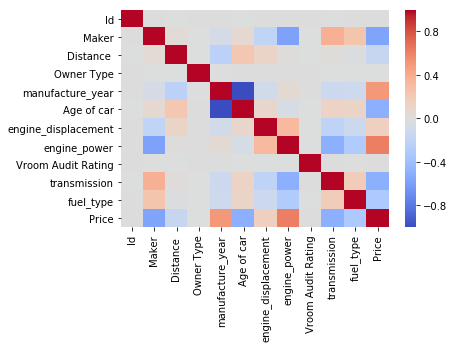

In [70]:

sns.heatmap(train.corr(),cmap='coolwarm')

In [71]:
train["Distance "] = train.groupby("Owner Type").transform(lambda x: x.fillna(x.mean()))

In [72]:
train["Distance "].isnull().sum()

0

In [73]:
train.isnull().sum()

Id                     0
Maker                  0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
fuel_type              0
Price                  0
dtype: int64

In [74]:
train.dtypes

Id                       int64
Maker                    int32
Distance               float64
Owner Type               int32
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
transmission             int32
fuel_type                int32
Price                  float64
dtype: object

# Test Data

In [75]:
test["Maker"].value_counts()

skoda       2251
toyota       851
audi         747
bmw          704
nissan       597
hyundai      260
fiat         200
maserati       5
Name: Maker, dtype: int64

In [76]:
test["Owner Type"].value_counts()

First             1491
Third             1413
Fourth & Above    1376
Second            1335
Name: Owner Type, dtype: int64

In [77]:
test.drop(["model","Location","door_count","body_type","seat_count"],axis=1,inplace=True)

In [78]:
test.head()

,Id,Maker,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,fuel_type
0,11001,skoda,150000.0,First,2007,12,1595,75.0,5,man,petrol
1,11002,skoda,29376.0,Third,2014,5,1598,77.0,4,man,diesel
2,11003,skoda,30563.0,Second,2014,5,1968,110.0,5,man,diesel
3,11004,audi,8650.0,Fourth & Above,2015,4,1968,110.0,8,auto,diesel
4,11005,audi,6400.0,Third,2015,4,1984,169.0,4,auto,petrol


In [79]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
test['Owner Type']= label_encoder.fit_transform(test['Owner Type']) 


In [80]:
test["Owner Type"].value_counts()
# here 0 represents First hand
#3-Third hand
#2-Second hand
#1-Fourth and above

0    1491
3    1413
1    1376
2    1335
Name: Owner Type, dtype: int64

In [81]:
test.isnull().sum()

Id                       0
Maker                    0
Distance               128
Owner Type               0
manufacture_year         0
Age of car               0
engine_displacement      0
engine_power           168
Vroom Audit Rating       0
transmission             0
fuel_type                0
dtype: int64

In [82]:
test["Owner Type"].value_counts()

0    1491
3    1413
1    1376
2    1335
Name: Owner Type, dtype: int64

In [83]:
test["engine_power"].fillna(test["engine_power"].mean(),inplace=True)

In [84]:
test['Maker']= label_encoder.fit_transform(test['Maker'])
test['transmission']= label_encoder.fit_transform(test['transmission'])
test['fuel_type']= label_encoder.fit_transform(test['fuel_type'])

In [85]:
test["Distance "] = test.groupby("Owner Type").transform(lambda x: x.fillna(x.mean()))

In [86]:
test.isnull().sum()

Id                     0
Maker                  0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
fuel_type              0
dtype: int64

In [87]:
test.head()

,Id,Maker,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,fuel_type
0,11001,6,11001.0,0,2007,12,1595,75.0,5,1,1
1,11002,6,11002.0,3,2014,5,1598,77.0,4,1,0
2,11003,6,11003.0,2,2014,5,1968,110.0,5,1,0
3,11004,0,11004.0,1,2015,4,1968,110.0,8,0,0
4,11005,0,11005.0,3,2015,4,1984,169.0,4,0,1


# model building

In [88]:
X = train.drop('Price',1)
y = train['Price']

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [91]:
lr = LinearRegression()

In [92]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
print(f'R^2 score for train:', {lr.score(X_train, y_train)})
print(f'R^2 score for validation:', {lr.score(X_validation, y_validation)})

R^2 score for train: {0.682974466548681}
R^2 score for validation: {0.7034179209026401}


# Random forest

In [95]:
from sklearn.ensemble import RandomForestRegressor

params = {'n_estimators' : [2,5,8,10,15,18,20],
    'criterion':['mse','mae'],
    'max_depth':[3,5,7,9,11,13,15],
    'min_samples_split':[2,3,4],
    'min_samples_leaf' : [1,3,5]}

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [96]:
print('Train score -',rf.score(X_train,y_train))
print('test score - ',rf.score(X_validation,y_validation))

Train score - 0.9787467475955963
test score -  0.905016226407198


# Bagging

In [99]:
%matplotlib inline
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostRegressor
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

from warnings import filterwarnings
filterwarnings('ignore')
np.random.seed(0)

In [101]:
import xgboost
from sklearn.metrics import explained_variance_score

In [102]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
X_train_be,X_test_be,y_train_be,y_test_be = train_test_split(be_x,be_y,test_size = 0.3,random_state = 0)

xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

NameError: name 'be_x' is not defined

In [103]:
accuracy = explained_variance_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

NameError: name 'y_test' is not defined

# Gradient Boosting

In [104]:
from sklearn.ensemble import GradientBoostingRegressor
boost_reg = GradientBoostingRegressor(n_estimators=50,
                                      random_state=3)

In [105]:
print(boost_reg.fit(X_train, y_train))
print(boost_reg.score(X_validation, y_validation))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=3, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
0.9053430835585716


In [106]:
print(boost_reg.score(X_train, y_train))

0.8804666727896526


# Adabossting

In [107]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=1.0, loss='linear',
        n_estimators=100, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=100,
         random_state=0)

In [108]:
ada_clf.score(X_train, y_train)

0.9998573788307682

In [109]:
ada_clf.score(X_validation, y_validation)

0.8938292032936975

In [110]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=1.0, loss='linear',
        n_estimators=100, random_state=0)
ada_clf.fit(X, y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=100,
         random_state=0)

In [111]:
pred = ada_clf.predict(test)

In [113]:
target = ada_clf.predict(X_validation)

In [114]:
print(np.sqrt(mean_squared_error(y_validation,target)))

9671.415675757058


In [115]:
print(train.shape)
print(test.shape)

(53515, 12)
(5615, 11)


In [117]:
X.shape

(53515, 11)

In [118]:
test.shape

(5615, 11)

In [119]:
identity = pd.read_csv('Test Data Set.csv')

In [120]:
identity.shape

(5615, 16)

In [121]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_validation,target))
rmse

9671.415675757058

In [123]:
pd.DataFrame({'Unique Id':identity['Id'],'Price':pred}).to_csv('Srivatsan1_submission.csv',index=False)